## Plotting using jupyter notebooks and the ggplot module in Python

- First, install **Anaconda** (Python 3.6 distribution with jupyter and other data analysis modules included) following the directions here: https://www.continuum.io/downloads


- Open **Anaconda Prompt** (Windows) or **Terminal** (Mac) and type:

    `pip install ggplot`
    

- Next, start jupyter by typing:

    `jupyter notebook`


- Generate a new notebook by clicking **New**, followed by **Python** under **Notebooks**. Give it a name by clicking on **Untitled**.


- Test the code that follows in your new notebook. The code is also available in this [notebook](http://hwheeler01.github.io/comp150/ggplot/ggplot_tutorial.ipynb) for your reference. 


- For more details on jupyter notebooks, see <http://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/index.html>


- For more details on ggplot, see http://ggplot.yhathq.com/how-it-works.html

In [1]:
### Import needed modules
#ggplot is used for plotting and is based on the R package ggplot2
#Pandas is a widely-used Python library for statistics, particularly on tabular data. It installed with Anaconda.
#We will use it to read and write tables in .csv format.

from ggplot import *
import pandas

### Download the gapminder CSV file
<http://hwheeler01.github.io/comp150/ggplot/gapminder.csv>
    
- You might need to right-click the link to save.
- Place the file in the same folder as this notebook (`.ipynb` file).

In [3]:
### read in the gapminder data as a pandas DataFrame
gap = pandas.read_csv('gapminder.csv')

In [4]:
### Use DataFrame.info to find out more about a DataFrame
gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [5]:
### Use DataFrame.head to view the first few rows
print(gap.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


In [6]:
### to see more
print(gap.head(n=20))

        country continent  year  lifeExp       pop    gdpPercap
0   Afghanistan      Asia  1952   28.801   8425333   779.445314
1   Afghanistan      Asia  1957   30.332   9240934   820.853030
2   Afghanistan      Asia  1962   31.997  10267083   853.100710
3   Afghanistan      Asia  1967   34.020  11537966   836.197138
4   Afghanistan      Asia  1972   36.088  13079460   739.981106
5   Afghanistan      Asia  1977   38.438  14880372   786.113360
6   Afghanistan      Asia  1982   39.854  12881816   978.011439
7   Afghanistan      Asia  1987   40.822  13867957   852.395945
8   Afghanistan      Asia  1992   41.674  16317921   649.341395
9   Afghanistan      Asia  1997   41.763  22227415   635.341351
10  Afghanistan      Asia  2002   42.129  25268405   726.734055
11  Afghanistan      Asia  2007   43.828  31889923   974.580338
12      Albania    Europe  1952   55.230   1282697  1601.056136
13      Albania    Europe  1957   59.280   1476505  1942.284244
14      Albania    Europe  1962   64.820

In [7]:
### to see the last few rows
print(gap.tail())

       country continent  year  lifeExp       pop   gdpPercap
1699  Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700  Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701  Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702  Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [8]:
### Use DataFrame.describe to get summary statistics about continuous data
print(gap.describe())

             year      lifeExp           pop      gdpPercap
count  1704.00000  1704.000000  1.704000e+03    1704.000000
mean   1979.50000    59.474439  2.960121e+07    7215.327081
std      17.26533    12.917107  1.061579e+08    9857.454543
min    1952.00000    23.599000  6.001100e+04     241.165877
25%    1965.75000    48.198000  2.793664e+06    1202.060309
50%    1979.50000    60.712500  7.023596e+06    3531.846989
75%    1993.25000    70.845500  1.958522e+07    9325.462346
max    2007.00000    82.603000  1.318683e+09  113523.132900


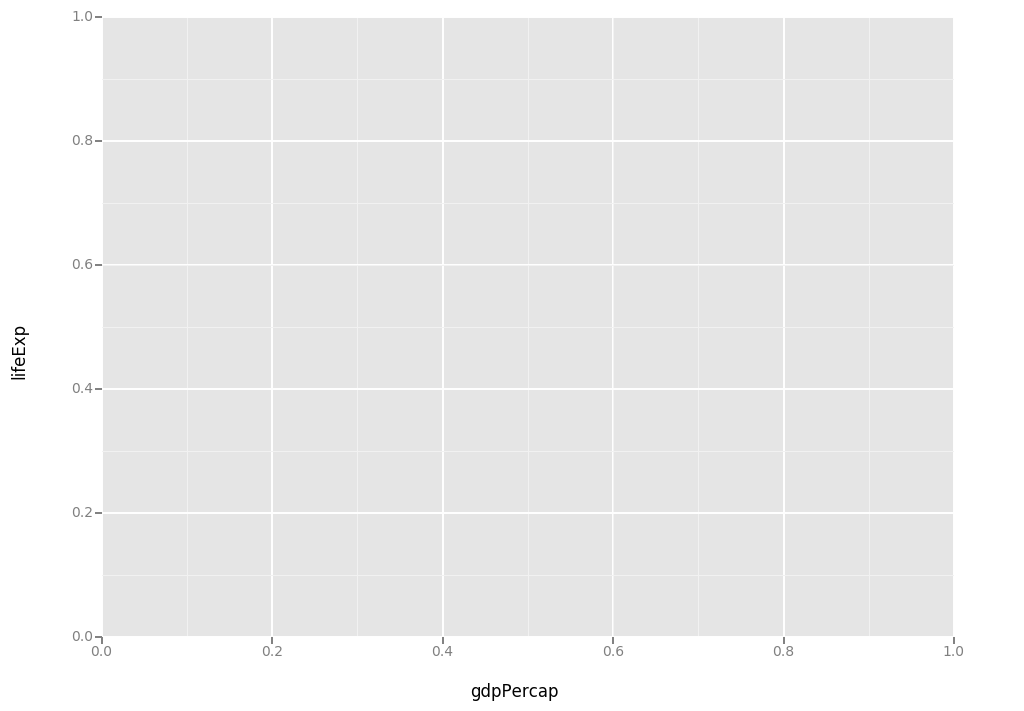

<ggplot: (272831117)>

In [9]:
### Let's initialize a plot
ggplot(gap, aes(x = 'gdpPercap', y = 'lifeExp'))

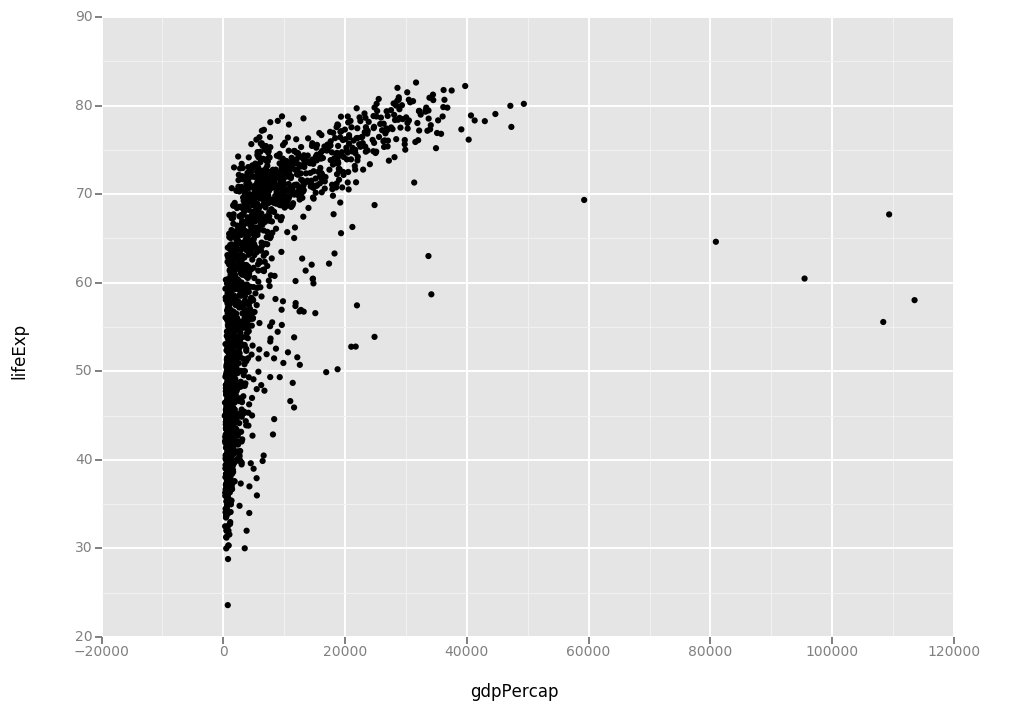

<ggplot: (292753626)>

In [10]:
### Add points
ggplot(gap, aes(x = 'gdpPercap', y = 'lifeExp')) + geom_point()

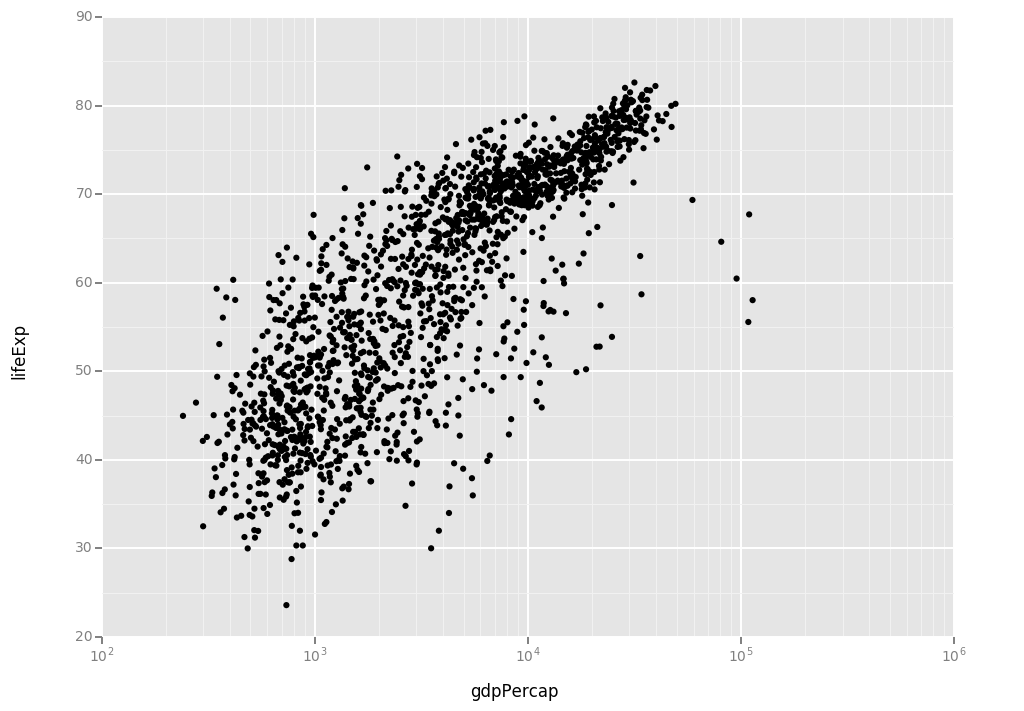

<ggplot: (293196324)>

In [11]:
### Let's log transform the x-axis
ggplot(gap, aes(x = 'gdpPercap', y = 'lifeExp')) + geom_point() + scale_x_log()

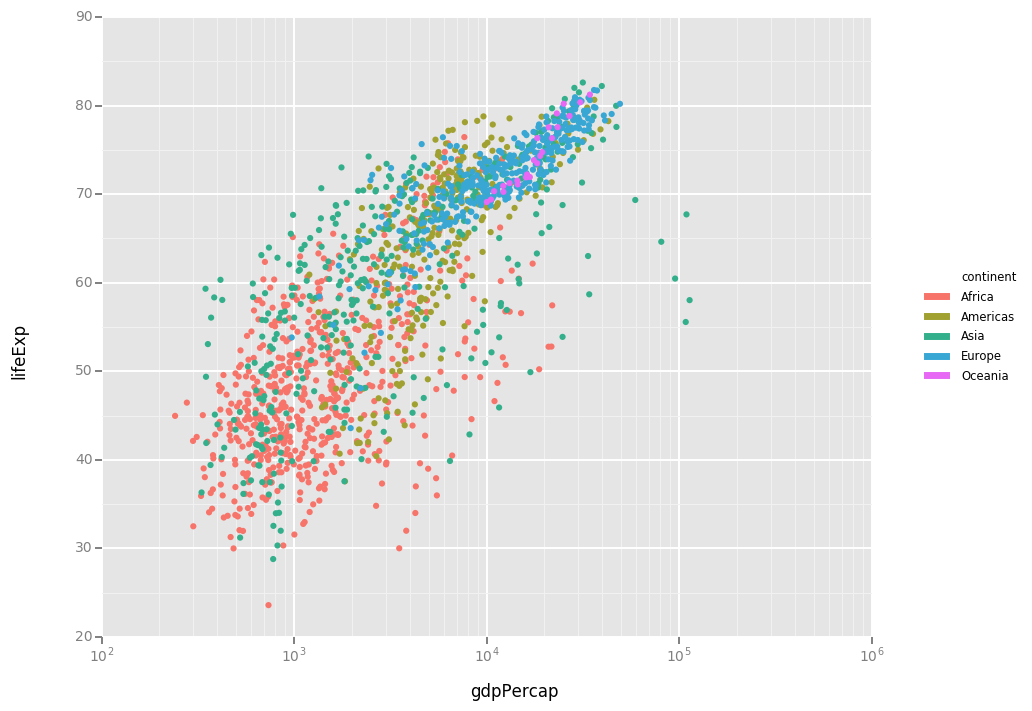

<ggplot: (-9223372036561963811)>

In [12]:
### How about some color?
ggplot(gap, aes(x = 'gdpPercap', y = 'lifeExp', color = 'continent')) + geom_point() + scale_x_log()

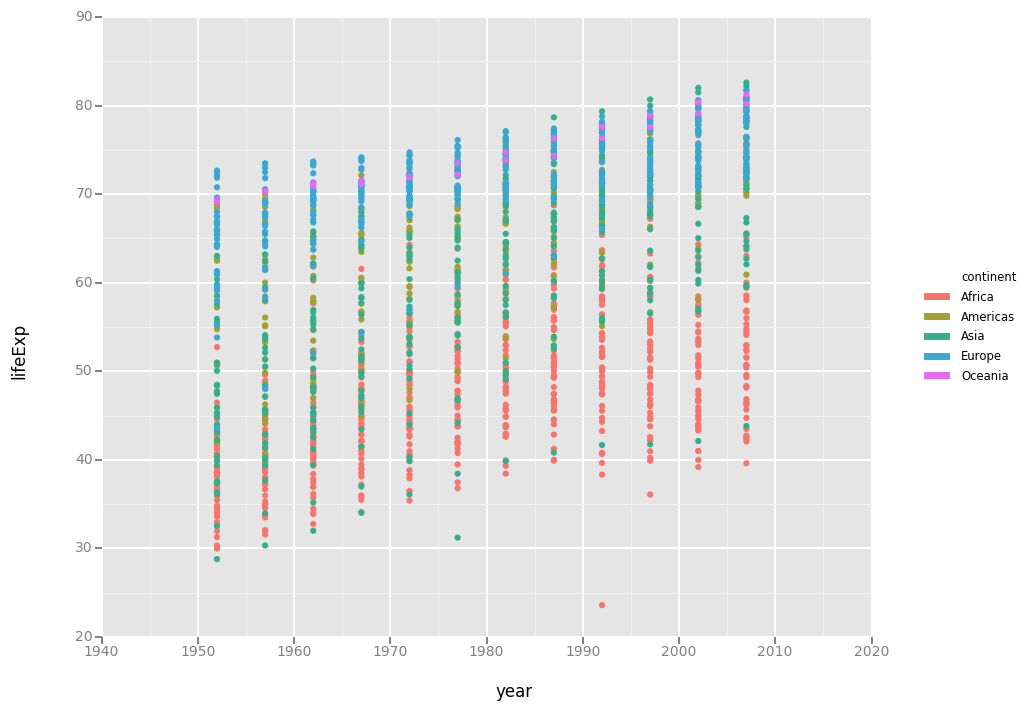

<ggplot: (-9223372036561484256)>

In [13]:
### Plot lifeExp vs. year colored by continent
ggplot(gap, aes(x = 'year', y = 'lifeExp', color = 'continent')) + geom_point()

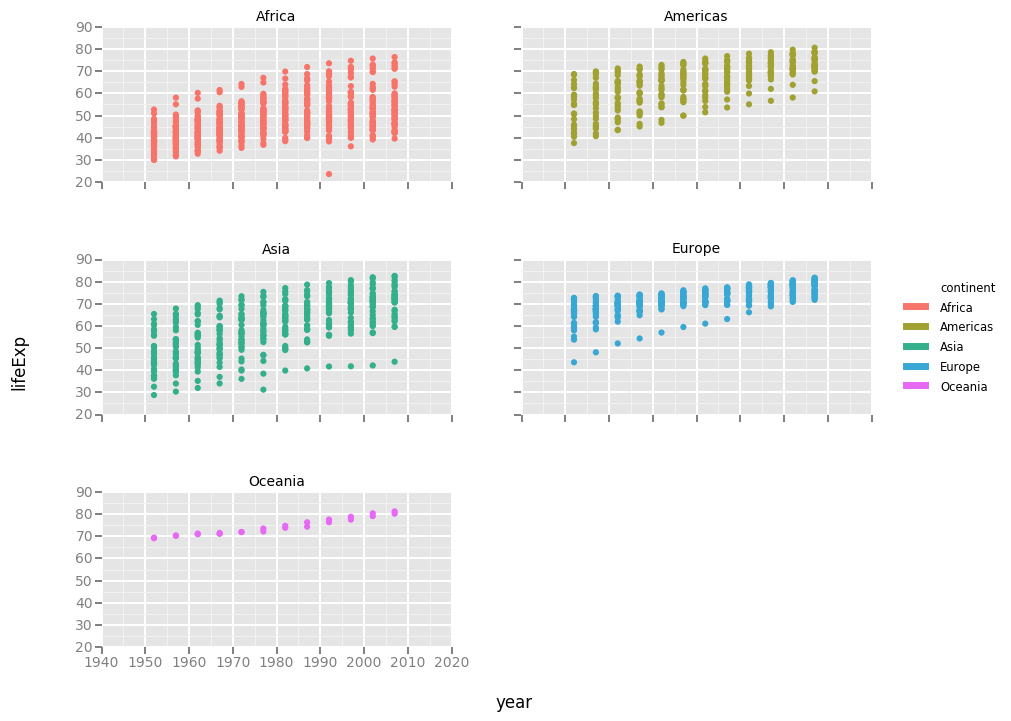

<ggplot: (293033683)>

In [14]:
### Let's separate by continent
ggplot(gap, aes(x = 'year', y = 'lifeExp', color = 'continent')) + geom_point() + facet_wrap('continent')

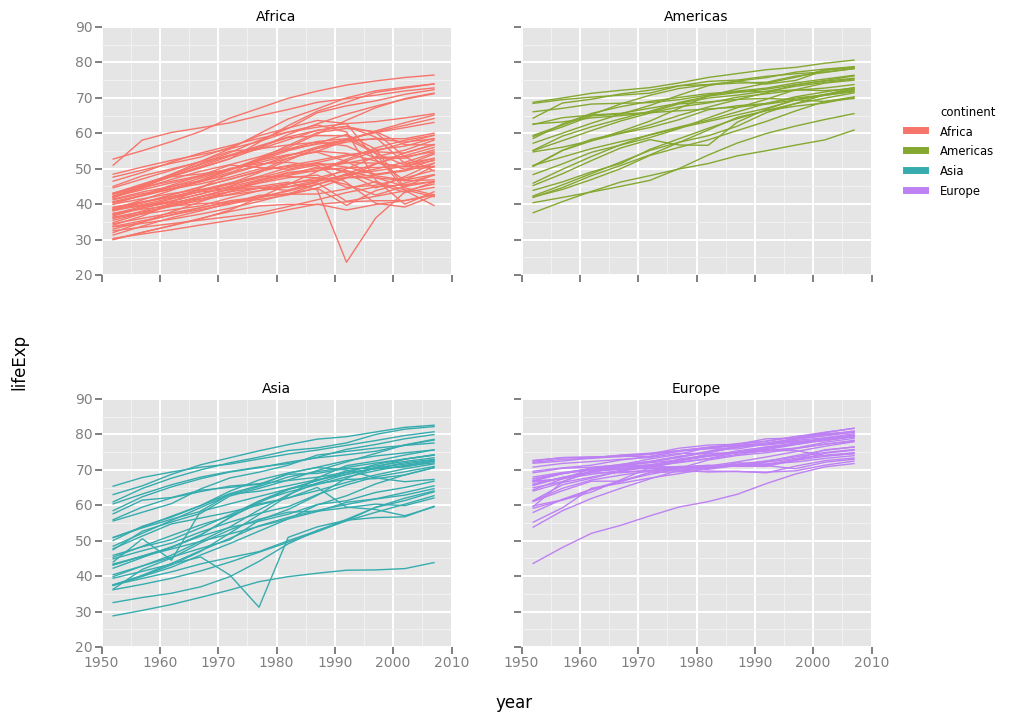

<ggplot: (295034702)>

In [15]:
### Let's remove Oceania and connect countries with lines
no_oceania = gap[gap.continent != 'Oceania']

ggplot(no_oceania, aes(x = 'year', y = 'lifeExp', color = 'continent', group = 'country')) + \
    geom_line() + facet_wrap('continent')

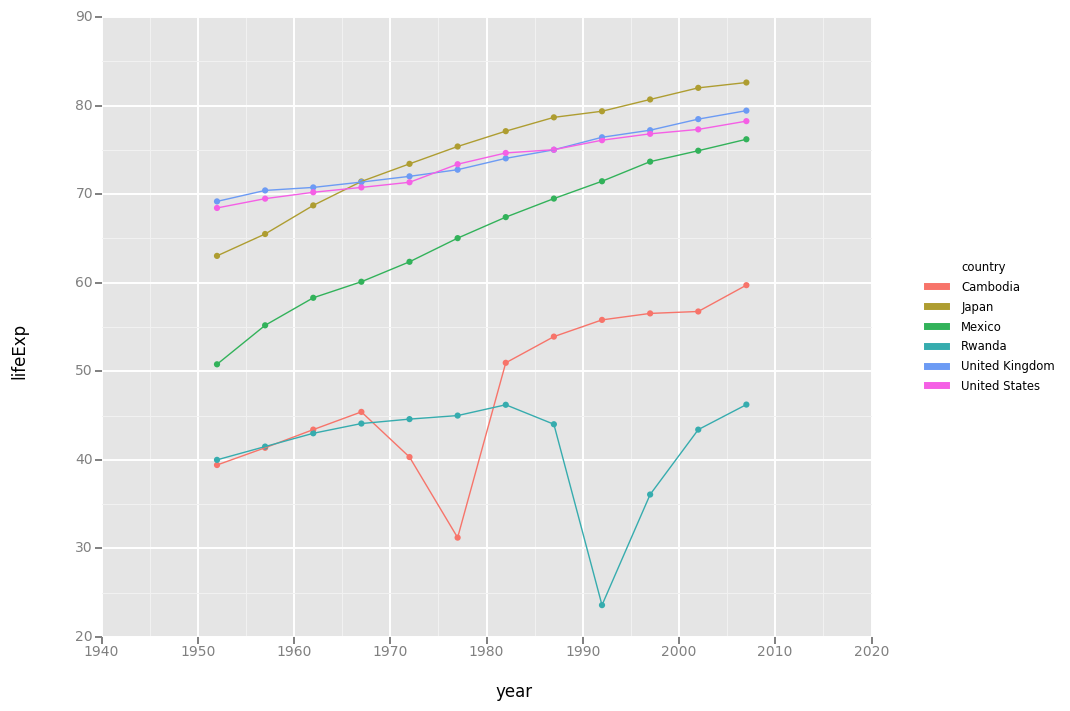

<ggplot: (-9223372036555096327)>

In [16]:
### Let's pull out a subset of countries to plot
subgap = gap[gap.country.str.contains("Cambodia|Rwanda|United|Japan|Mexico")]
ggplot(subgap, aes(x = 'year', y = 'lifeExp', color = 'country')) + geom_line() + geom_point()

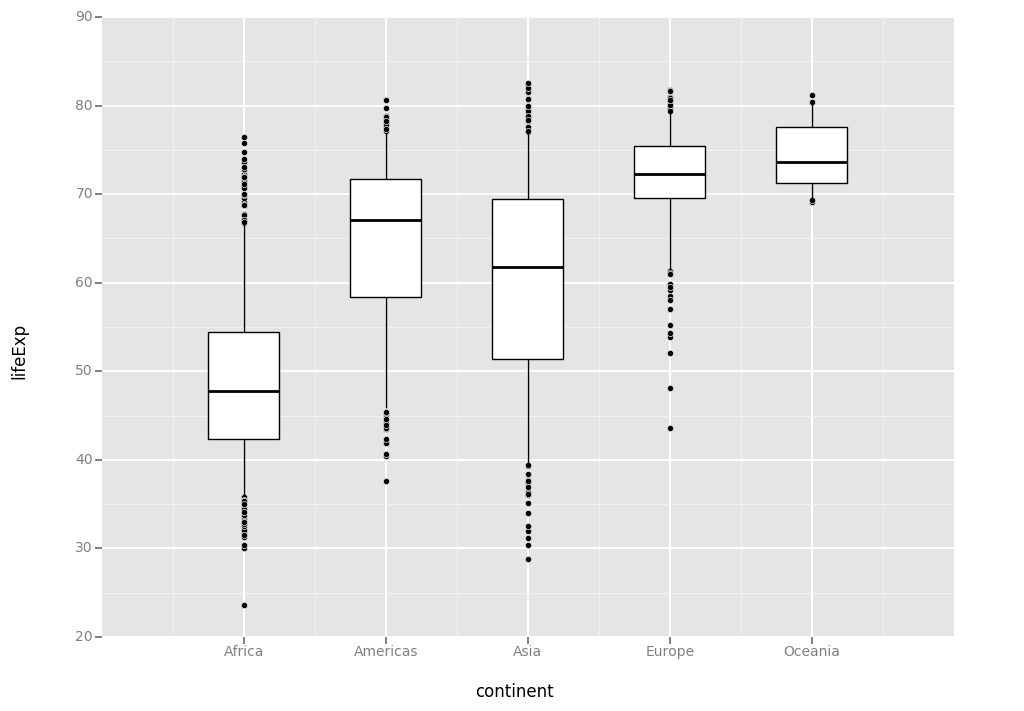

<ggplot: (-9223372036559668171)>

In [17]:
### We can also do boxplots
ggplot(gap, aes(x = 'continent', y = 'lifeExp')) + geom_boxplot()

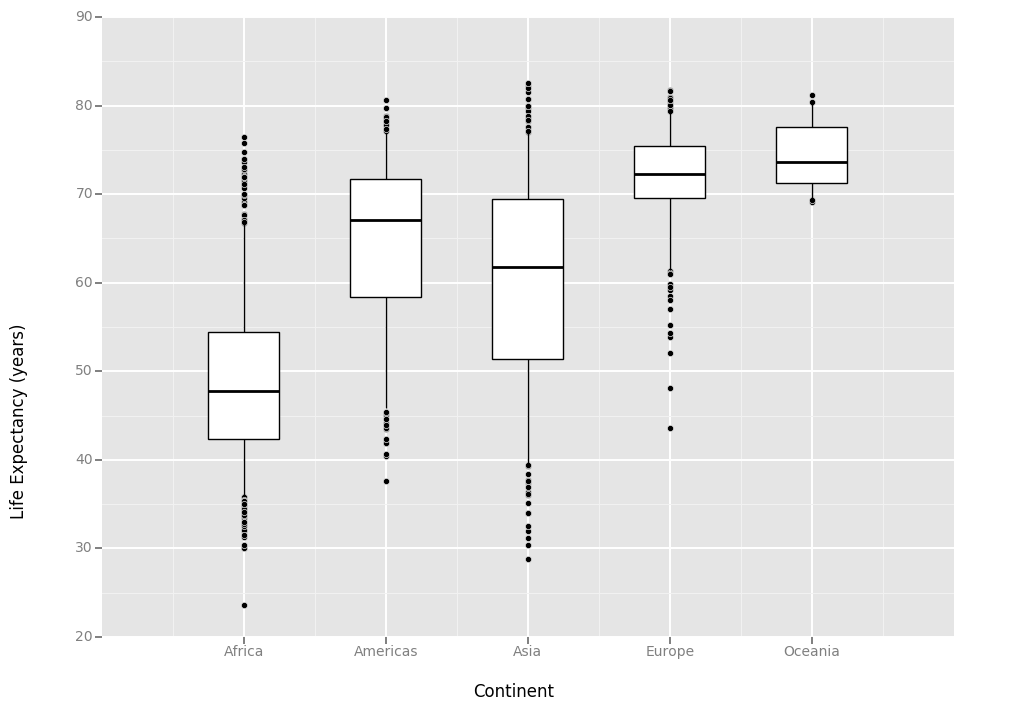

<ggplot: (-9223372036561257640)>

In [18]:
### and change axis labels
ggplot(gap, aes(x = 'continent', y = 'lifeExp')) + geom_boxplot() + xlab("Continent") + ylab("Life Expectancy (years)")

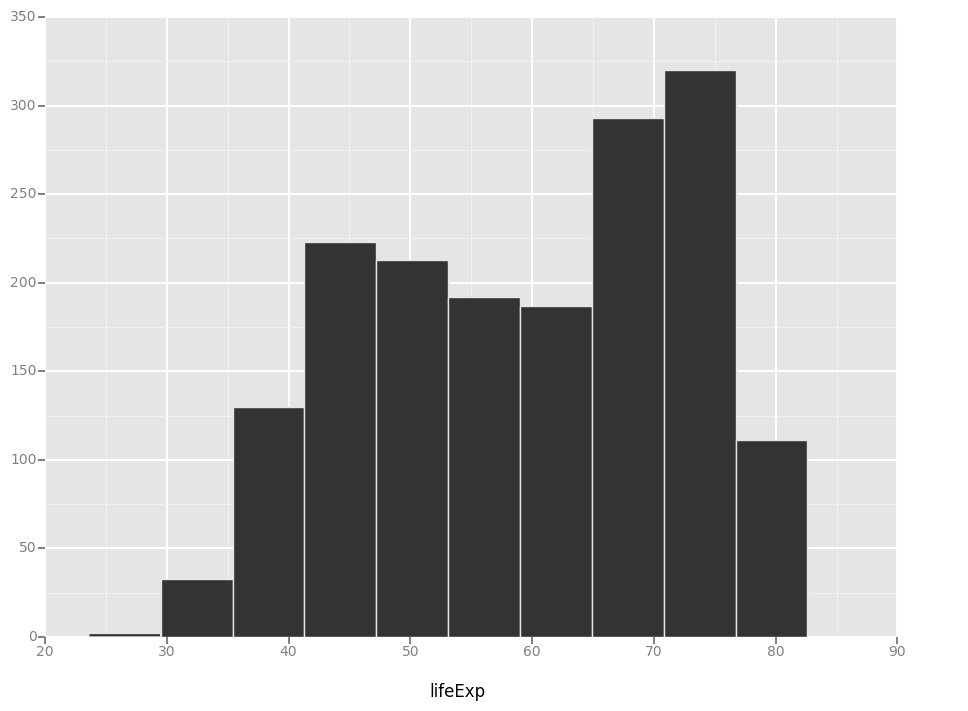

<ggplot: (-9223372036561689575)>

In [19]:
### and histograms
ggplot(gap, aes(x = 'lifeExp')) + geom_histogram()

binwidth = 1


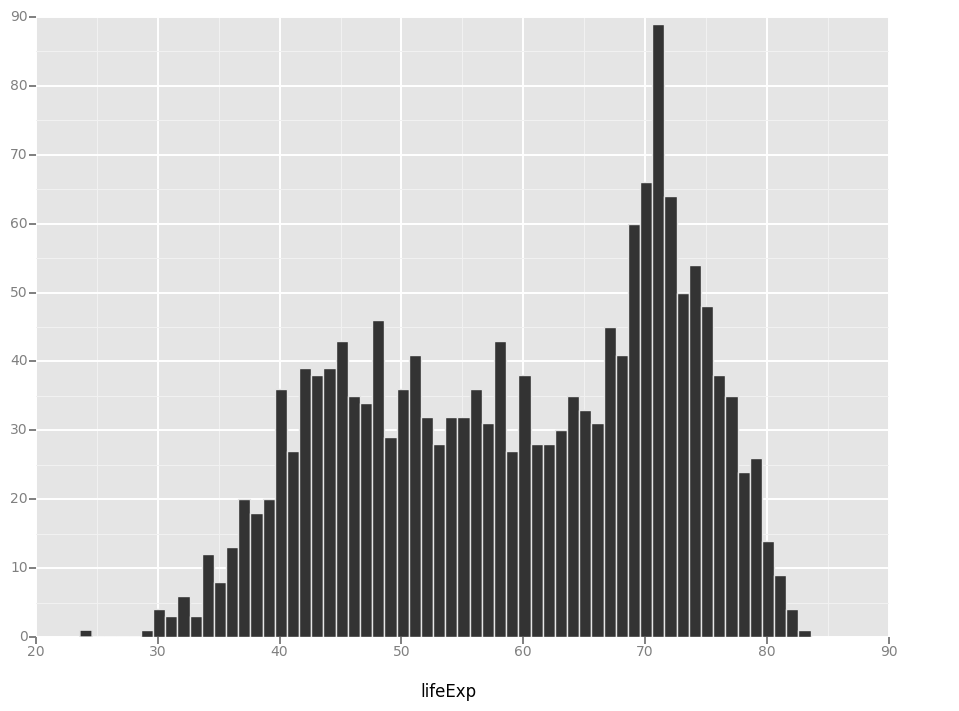

<ggplot: (300736916)>


binwidth = 2


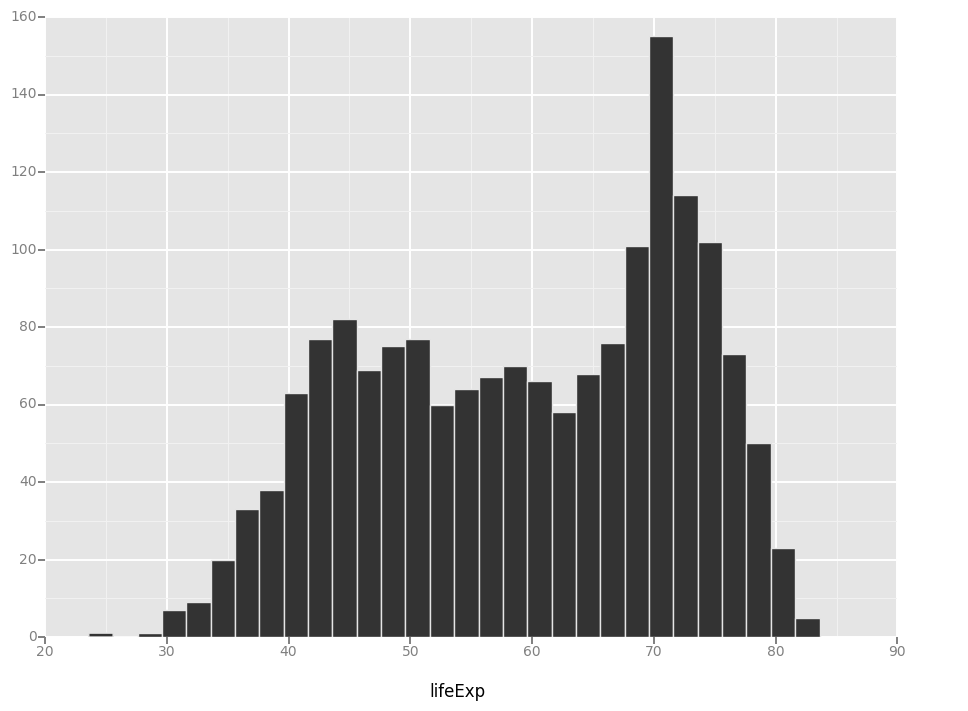

<ggplot: (-9223372036554567957)>


binwidth = 3


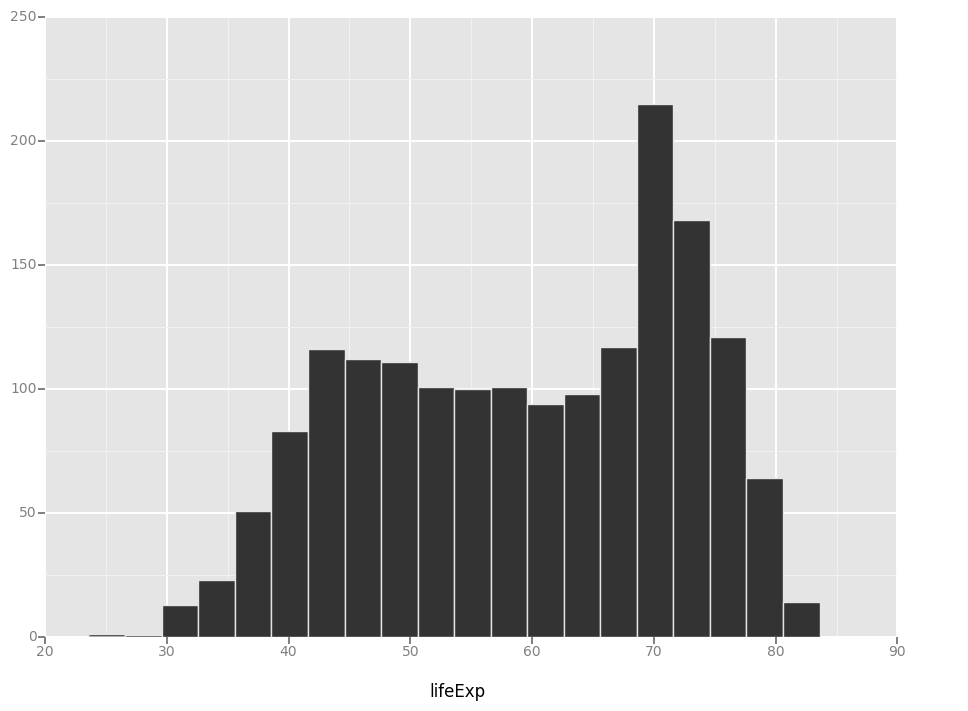

<ggplot: (300215002)>




In [20]:
### we can adjust binwidth
for i in range(1,4):
    print("binwidth = " + str(i))
    print(ggplot(gap, aes(x = 'lifeExp')) + geom_histogram(binwidth = i))
    print("\n")

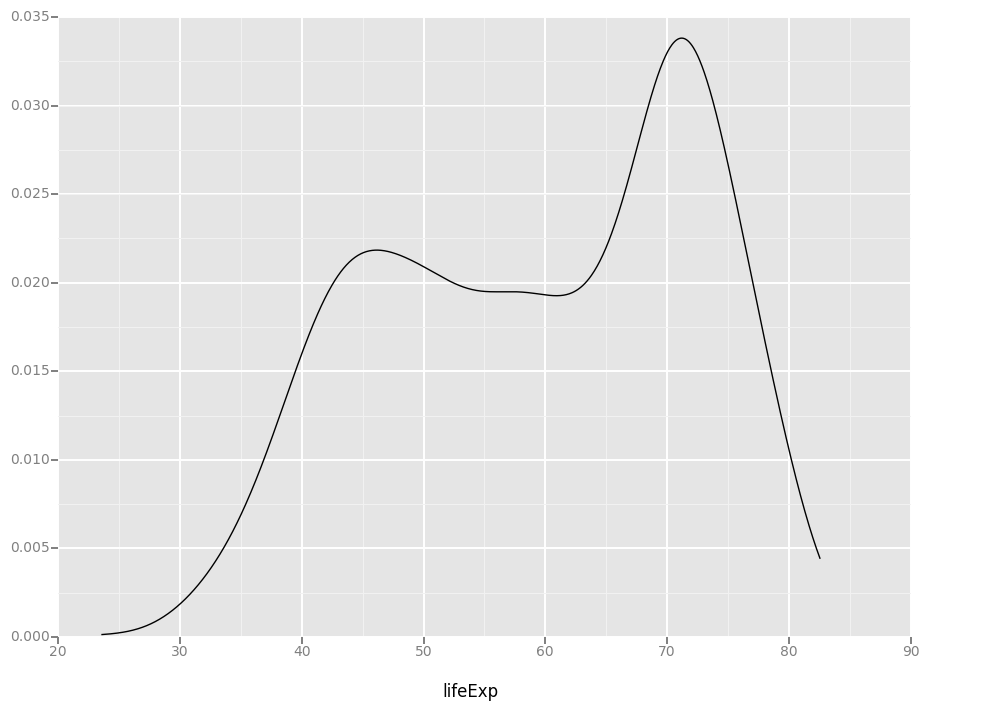

<ggplot: (295099824)>

In [21]:
### we can make density plots
ggplot(gap, aes(x = 'lifeExp')) + geom_density()

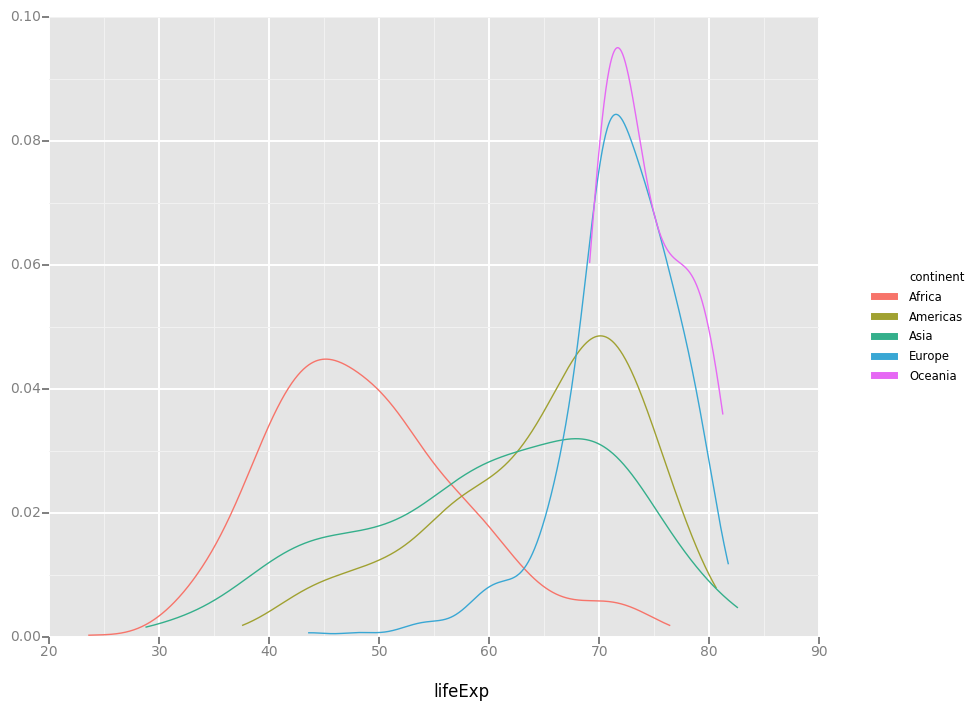

<ggplot: (-9223372036553680331)>

In [22]:
### and color by continent
ggplot(gap, aes(x = 'lifeExp', color = 'continent')) + geom_density()

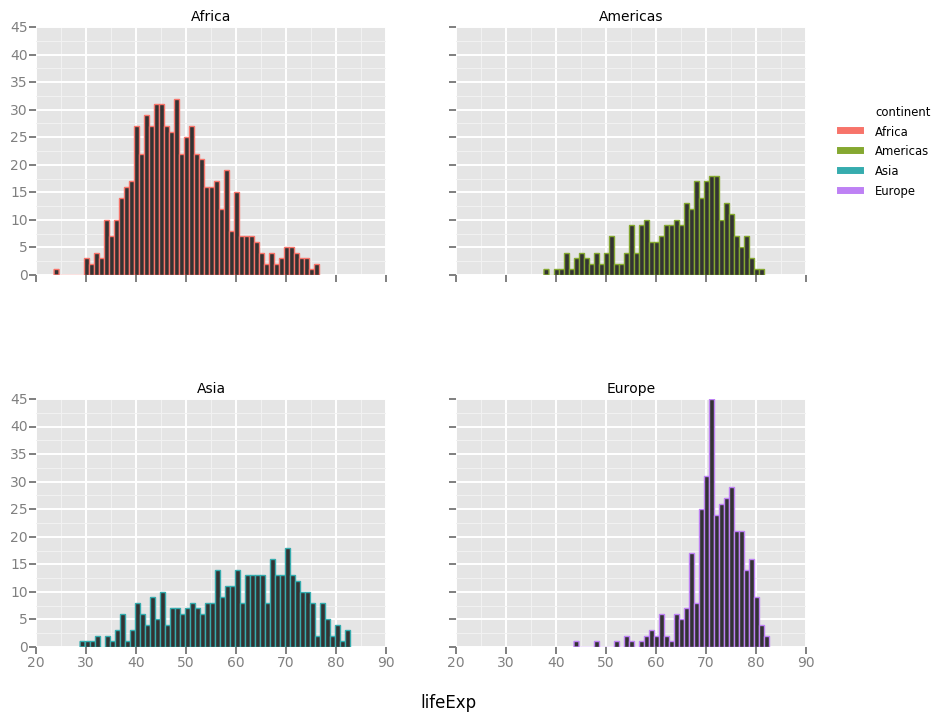

<ggplot: (301073086)>

In [23]:
### we can facet anything
ggplot(no_oceania, aes(x = 'lifeExp',color = 'continent')) + geom_histogram(binwidth = 1) + \
    facet_wrap('continent')

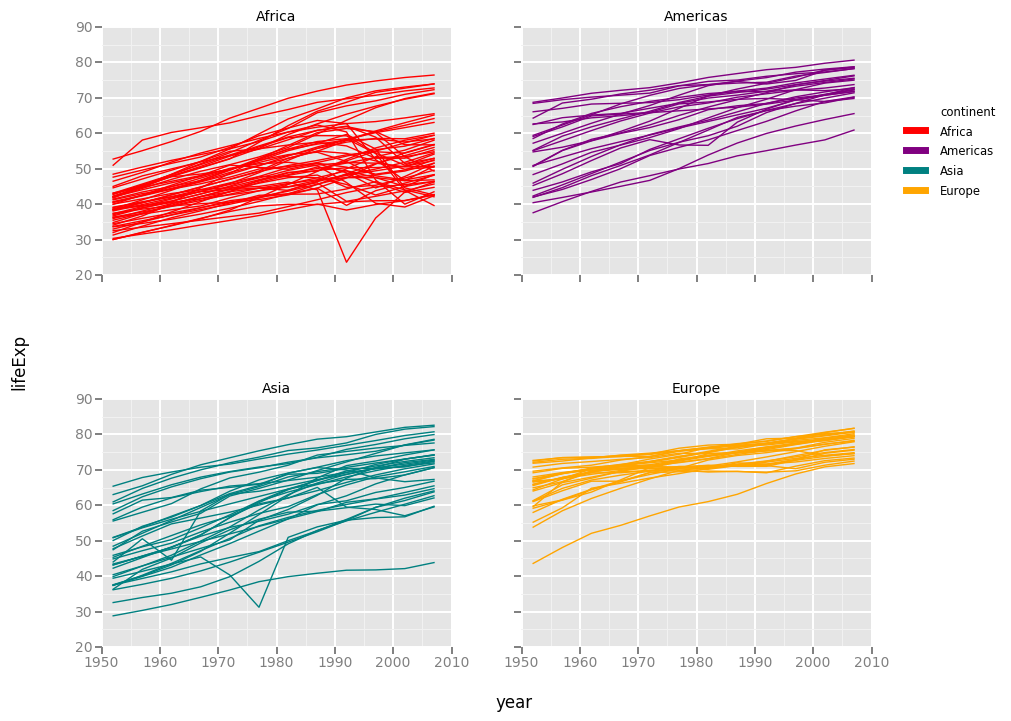

<ggplot: (301325425)>

In [24]:
### Let's play with colors!
ggplot(no_oceania, aes(x = 'year', y = 'lifeExp', color = 'continent', group = 'country')) + \
    geom_line() + facet_wrap('continent') + scale_color_manual(values = ['red','purple','teal','orange'])

### Print a list of options from the color brewer, see <http://colorbrewer2.org/> for visual details.

In [25]:
import brewer2mpl
brewer2mpl.print_maps()

Sequential
Blues     :  {3, 4, 5, 6, 7, 8, 9}
BuGn      :  {3, 4, 5, 6, 7, 8, 9}
BuPu      :  {3, 4, 5, 6, 7, 8, 9}
GnBu      :  {3, 4, 5, 6, 7, 8, 9}
Greens    :  {3, 4, 5, 6, 7, 8, 9}
Greys     :  {3, 4, 5, 6, 7, 8, 9}
OrRd      :  {3, 4, 5, 6, 7, 8, 9}
Oranges   :  {3, 4, 5, 6, 7, 8, 9}
PuBu      :  {3, 4, 5, 6, 7, 8, 9}
PuBuGn    :  {3, 4, 5, 6, 7, 8, 9}
PuRd      :  {3, 4, 5, 6, 7, 8, 9}
Purples   :  {3, 4, 5, 6, 7, 8, 9}
RdPu      :  {3, 4, 5, 6, 7, 8, 9}
Reds      :  {3, 4, 5, 6, 7, 8, 9}
YlGn      :  {3, 4, 5, 6, 7, 8, 9}
YlGnBu    :  {3, 4, 5, 6, 7, 8, 9}
YlOrBr    :  {3, 4, 5, 6, 7, 8, 9}
YlOrRd    :  {3, 4, 5, 6, 7, 8, 9}
Diverging
BrBG      :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
PRGn      :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
PiYG      :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
PuOr      :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
RdBu      :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
RdGy      :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
RdYlBu    :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
RdYlGn    :  {3, 4, 5, 6, 7, 8, 9, 10, 11}
Spect

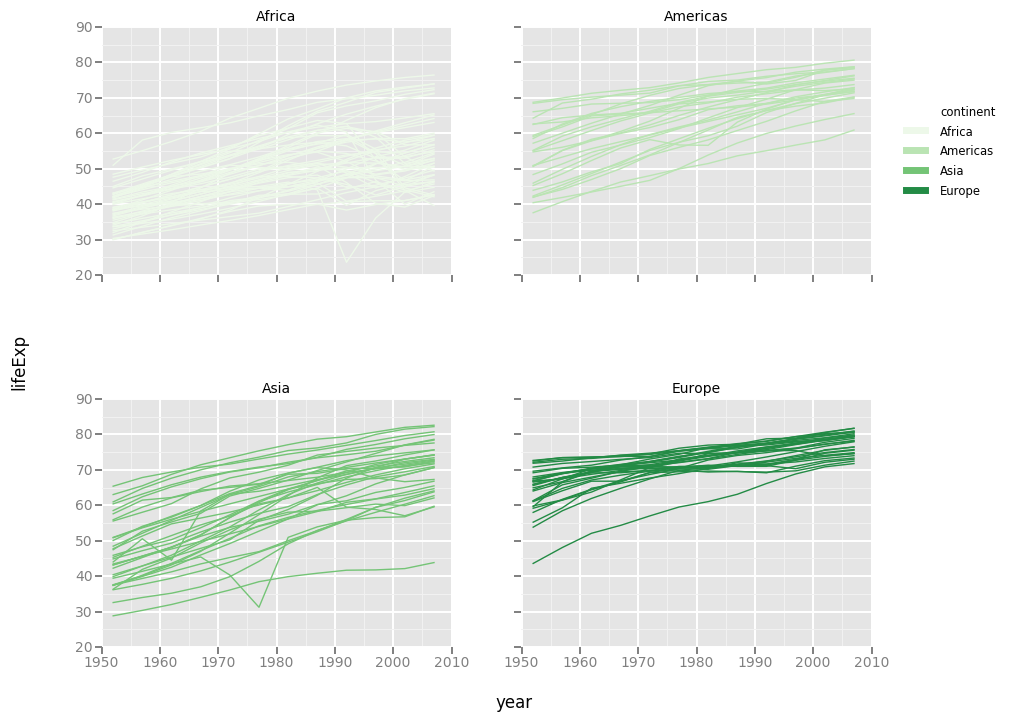

<ggplot: (-9223372036553467816)>

In [26]:
ggplot(no_oceania, aes(x = 'year', y = 'lifeExp', color = 'continent', group = 'country')) + \
    geom_line() + facet_wrap('continent') + scale_color_brewer(type = 'seq', palette = 'Greens')

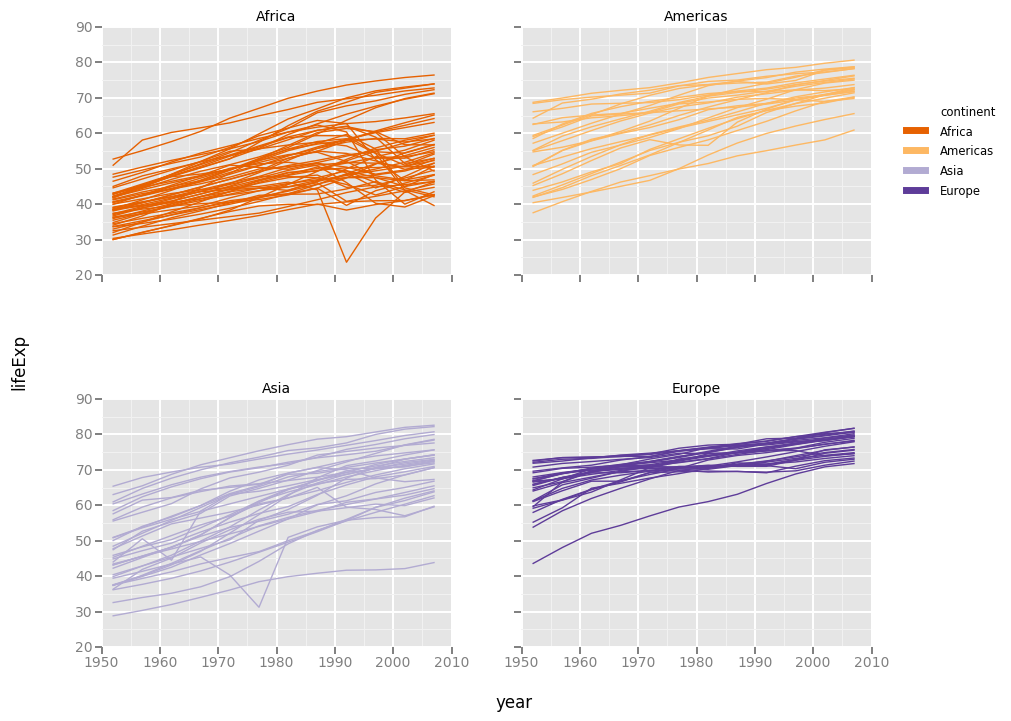

<ggplot: (303723717)>

In [27]:
ggplot(no_oceania, aes(x = 'year', y = 'lifeExp', color = 'continent', group = 'country')) + \
    geom_line() + facet_wrap('continent') + scale_color_brewer(type = 'div', palette = 'PuOr')

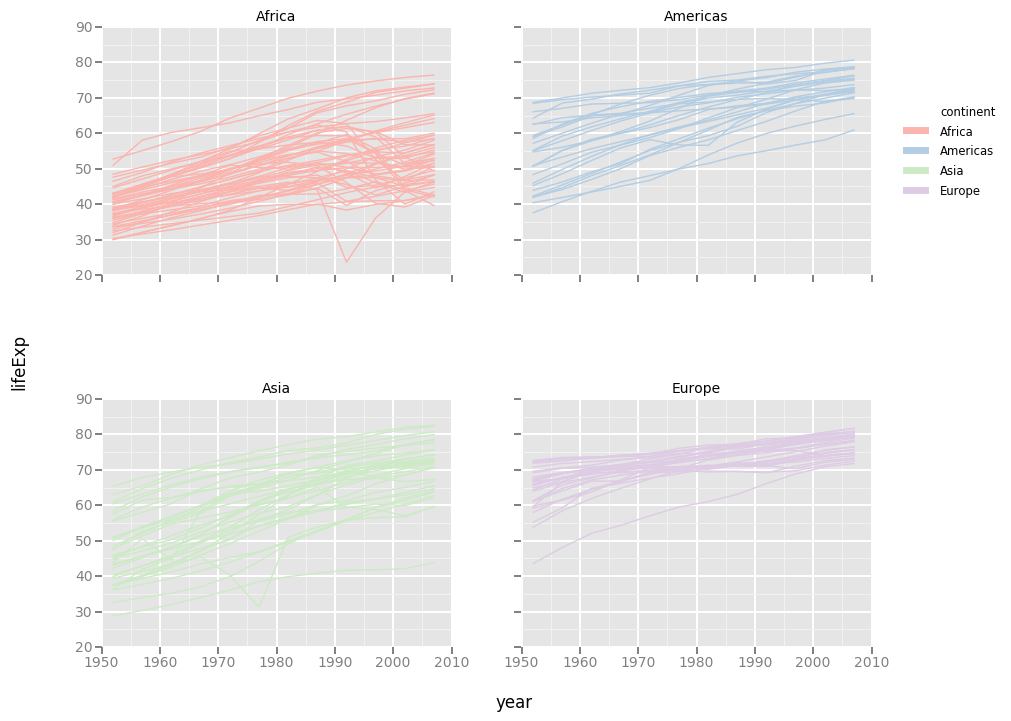

<ggplot: (-9223372036550512426)>

In [28]:
ggplot(no_oceania, aes(x = 'year', y = 'lifeExp', color = 'continent', group = 'country')) + \
    geom_line() + facet_wrap('continent') + scale_color_brewer(type = 'qual', palette = 'Pastel1')

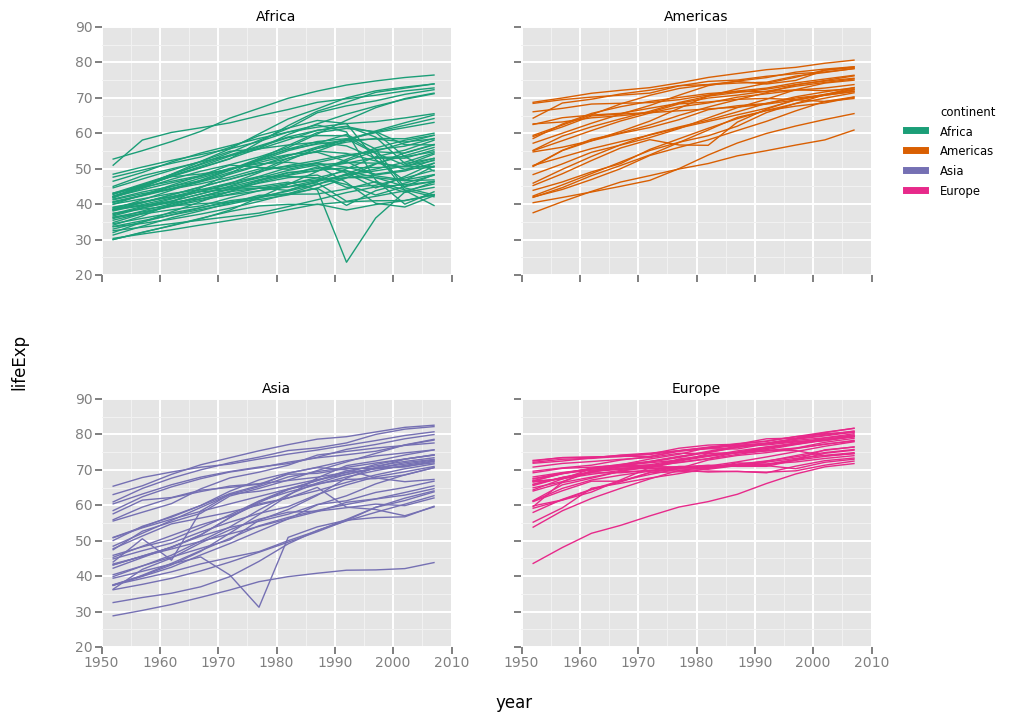

<ggplot: (-9223372036550080673)>

In [29]:
ggplot(no_oceania, aes(x = 'year', y = 'lifeExp', color = 'continent', group = 'country')) + \
    geom_line() + facet_wrap('continent') + scale_color_brewer(type = 'qual', palette = 'Dark2')

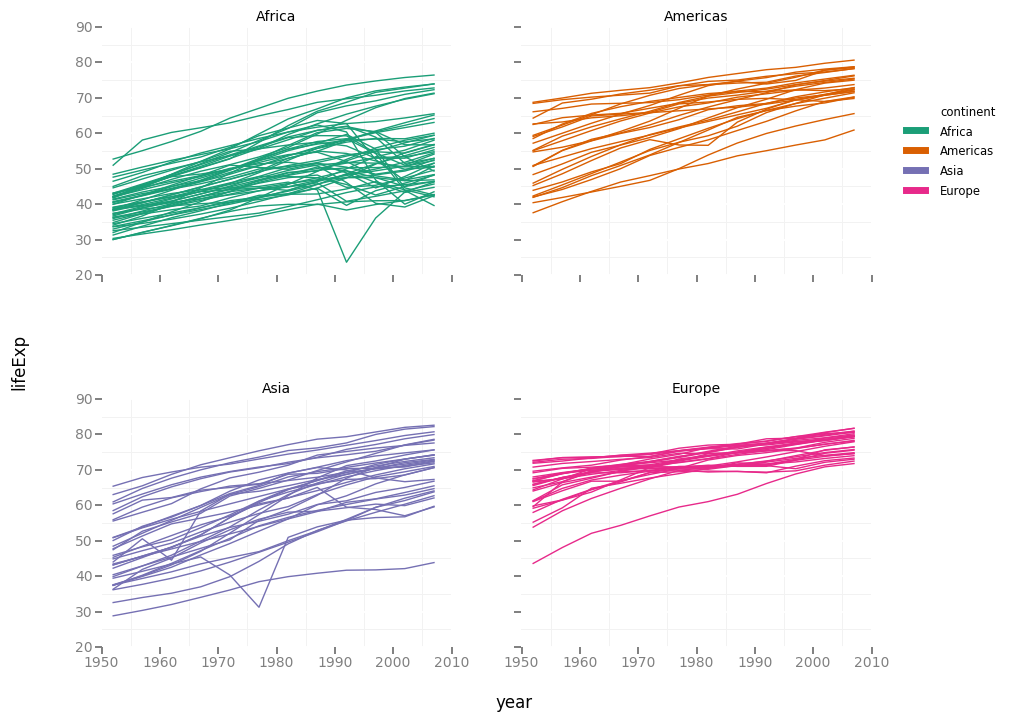

<ggplot: (305515468)>

In [30]:
### Change background theme
ggplot(no_oceania, aes(x = 'year', y = 'lifeExp', color = 'continent', group = 'country')) + \
    geom_line() + facet_wrap('continent') + scale_color_brewer(type = 'qual', palette = 'Dark2') + \
    theme_bw()